<a href="https://colab.research.google.com/github/arigebaccouri/Future-/blob/main/remodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Updated_With_Refined_Educational_Background.xlsx to Updated_With_Refined_Educational_Background.xlsx


In [ ]:
import pandas as pd

file_path = 'Updated_With_Refined_Educational_Background.xlsx'
data = pd.read_excel(file_path)

data.head()


,intitule,SAVOIR_ETRE,SAVOIR_FAIRE,compétences,Bilingual_Enhanced_Skills,Job_Category,Primary_Intelligence,Secondary_Intelligence,Job_Categories,Ranked_Job_Categories,Educational_Level,Educational_Field
0,développeur python,"['Autonomie', 'Capacité de communication', 'Ri...","['Linux', 'Python', 'Web', 'Administration sys...","Capacité à analyser des situations complexes, ...","['ui', 'r', 'ux', 'communication', 'git', 'pyt...",UI/UX Designer,creative,analytical,"['UI/UX Designer', 'Front End Development', 'B...","['UI/UX Designer', 'Back End Development', 'Fr...",Bachelor's Degree,Design
1,développeur python,Not available,"['Analyse des besoins', 'Django', 'Framework d...",Not available,['ai'],Back End Development,logical-mathematical,logical-mathematical,"['Back End Development', 'AI / Machine Learning']","['Back End Development', 'AI / Machine Learning']",Master's Degree,Engineering
2,développeur python,"[""Esprit d'équipe"", 'Force de proposition']","['Python', 'ReactJS', 'Application Web', 'Base...",Ingénieurs grandes écoles spécialité informati...,"['r', 'ux', 'api', 'cloud', 'javascript', 'iot...",UI/UX Designer,practical,spatial,"['UI/UX Designer', 'Business Analyst / Product...","['Cloud / DevOps', 'UI/UX Designer', 'Front En...",Engineer's Degree,Engineering
3,développeur python,"[""Esprit d'équipe"", 'Curiosité', 'Passionne', ...","['Qualité', 'Communication', 'Communication éc...","Python, Django, JS Une première expérience da...","['ui', 'r', 'communication', 'python', 'go', '...",UI/UX Designer,logical-mathematical,spatial,"['UI/UX Designer', 'Front End Development', 'B...","['Back End Development', 'UI/UX Designer', 'Fr...",Bachelor's Degree,Design
4,développeur python,"['Capacité de communication', 'Curiosité', ""Es...","['Scrum', 'Communication écrite', 'Communicati...",Python et Django et avez de bonnes connaissanc...,"['ui', 'r', 'communication', 'python', 'agile'...",UI/UX Designer,logical-mathematical,spatial,"['UI/UX Designer', 'Front End Development', 'B...","['Back End Development', 'UI/UX Designer', 'Fr...",Bachelor's Degree,Design


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Preprocessing the skills and job categories
def preprocess_skills_and_jobs(data):
    # Convert string representations of lists to actual lists
    data['SAVOIR_FAIRE'] = data['SAVOIR_FAIRE'].apply(lambda x: eval(x) if isinstance(x, str) else [])
    data['Job_Categories'] = data['Job_Categories'].apply(lambda x: eval(x) if isinstance(x, str) else [])

    # Binarize the skills and job categories
    mlb_skills = MultiLabelBinarizer()
    mlb_jobs = MultiLabelBinarizer()

    skills_binarized = mlb_skills.fit_transform(data['SAVOIR_FAIRE'])
    jobs_binarized = mlb_jobs.fit_transform(data['Job_Categories'])

    # Create DataFrames for the binarized skills and jobs
    skills_df = pd.DataFrame(skills_binarized, columns=mlb_skills.classes_)
    jobs_df = pd.DataFrame(jobs_binarized, columns=mlb_jobs.classes_)

    return skills_df, jobs_df

# Preprocess the data
skills_df, jobs_df = preprocess_skills_and_jobs(data)

# Combine the skills and jobs DataFrames for ARM
combined_df = pd.concat([skills_df, jobs_df], axis=1)
combined_df.head()


,3D Experience,ACI,ADAS,ADN,ARIANE,ASP.NET,AV1,AWX,Abaqus,Accompagnement du client,...,Cloud / DevOps,Content Creator / Community Management,Cybersecurity,"Data Science, Big Data, DB Engineering",Front End Development,Full Stack Development,Network and System Engineering,Project Manager,"Support, ITSM, Customer Services",UI/UX Designer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
import ast

# Load the original dataset
file_path = '/content/Updated_With_Refined_Educational_Background (1).xlsx'
data = pd.read_excel(file_path)

# Correctly parse the skills and job categories
data['SAVOIR_FAIRE'] = data['SAVOIR_FAIRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
data['Job_Categories'] = data['Job_Categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Binarize the skills and job categories
mlb_skills = MultiLabelBinarizer()
mlb_jobs = MultiLabelBinarizer()

skills_binarized = mlb_skills.fit_transform(data['SAVOIR_FAIRE'])
jobs_binarized = mlb_jobs.fit_transform(data['Job_Categories'])

skills_df = pd.DataFrame(skills_binarized, columns=mlb_skills.classes_)
jobs_df = pd.DataFrame(jobs_binarized, columns=mlb_jobs.classes_)

# Combine the skills and jobs DataFrames for ARM
combined_df = pd.concat([skills_df, jobs_df], axis=1)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(combined_df, min_support=0.1, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Ensure antecedents are only skills and consequents are only job roles
skill_columns = skills_df.columns.tolist()
job_columns = jobs_df.columns.tolist()

rules = rules[rules['antecedents'].apply(lambda x: all(item in skill_columns for item in x))]
rules = rules[rules['consequents'].apply(lambda x: all(item in job_columns for item in x))]

# Define thresholds
confidence_threshold = 0.7
lift_threshold = 1.0

# Filter rules based on confidence and lift
filtered_rules = rules[(rules['confidence'] >= confidence_threshold) &
                       (rules['lift'] >= lift_threshold)]

# Sort rules by lift to see the most interesting ones
sorted_filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the top 10 rules
print("Top 10 rules after filtering:")
print(sorted_filtered_rules.head(10))

# List all unique skills in the antecedents of the rules
unique_skills_in_rules = set()
for antecedent in sorted_filtered_rules['antecedents']:
    unique_skills_in_rules.update(antecedent)

print("Unique skills in rules:", unique_skills_in_rules)

# Verify exact combinations of skills in antecedents
print("Antecedents in rules:")
print(sorted_filtered_rules['antecedents'].unique())

# Implement the recommendation function with detailed logging
def recommend_job_categories(skills):
    # Convert input skills to a frozenset
    input_skills = frozenset(skills)

    # Log the input skills
    print("Input skills:", input_skills)

    # Find matching rules
    matching_rules = sorted_filtered_rules[sorted_filtered_rules['antecedents'].apply(lambda x: input_skills.issubset(x))]

    # Log the matching rules
    print("Matching rules:\n", matching_rules)

    # Extract job categories from consequents
    recommended_jobs = set()
    for consequents in matching_rules['consequents']:
        recommended_jobs.update(consequents)

    return recommended_jobs

# Example usage with different skills
user_skills = ['Python', 'JavaScript']
print("User skills:", user_skills)
recommended_jobs = recommend_job_categories(user_skills)
print("Recommended job categories:", recommended_jobs)

# Save the filtered and sorted rules to a CSV file
sorted_filtered_rules.to_csv('filtered_association_rules.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('filtered_association_rules.csv')


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 rules after filtering:
        antecedents                                        consequents  \
7286          (SQL)  (Business Analyst / Product Owner, Back End De...   
4170          (SQL)  (Business Analyst / Product Owner, AI / Machin...   
6298  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
8182  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
8957          (SQL)  (UI/UX Designer, Business Analyst / Product Ow...   
7308          (SQL)  (UI/UX Designer, Business Analyst / Product Ow...   
6454  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
3609  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
4232          (SQL)  (Business Analyst / Product Owner, Back End De...   
1423          (SQL)  (Business Analyst / Product Owner, Back End De...   

      antecedent support  consequent support   support  confidence      lift  \
7286            0.162907            0.240602  0.150376    0.923077  3.83653

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Example usage with valid skill combinations
valid_skill_combinations = [
    ['Python', 'SQL'],
    ['Docker', 'Ansible'],
    ['Amazon Web Services', 'Python'],
    ['Linux', 'Python'],
    ['Python', 'Jenkins'],
]

for skills in valid_skill_combinations:
    print(f"User skills: {skills}")
    recommended_jobs = recommend_job_categories(skills)
    print(f"Recommended job categories for {skills}: {recommended_jobs}")


User skills: ['Python', 'SQL']
Input skills: frozenset({'SQL', 'Python'})
Matching rules:
         antecedents                                        consequents  \
6298  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
8182  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
6454  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
3609  (SQL, Python)  (Business Analyst / Product Owner, Back End De...   
9111  (SQL, Python)  (UI/UX Designer, Business Analyst / Product Ow...   
8238  (SQL, Python)  (UI/UX Designer, Business Analyst / Product Ow...   
3574  (SQL, Python)  (Business Analyst / Product Owner, AI / Machin...   
6373  (SQL, Python)  (Business Analyst / Product Owner, AI / Machin...   
8409  (SQL, Python)  (UI/UX Designer, Business Analyst / Product Ow...   
6485  (SQL, Python)  (UI/UX Designer, Business Analyst / Product Ow...   
1222  (SQL, Python)                 (Business Analyst / Product Owner)   
3649  (SQL, Python)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#integration with the recommendation engine
class CareerRecommendationEngine:
    def __init__(self, rules):
        self.rules = rules

    def recommend_job_categories(self, skills):
        input_skills = frozenset(skills)
        matching_rules = self.rules[self.rules['antecedents'].apply(lambda x: input_skills.issubset(x))]
        recommended_jobs = set()
        for consequents in matching_rules['consequents']:
            recommended_jobs.update(consequents)
        return recommended_jobs

# Example of using the engine
engine = CareerRecommendationEngine(sorted_filtered_rules)
user_skills = ['Python', 'SQL']
recommended_jobs = engine.recommend_job_categories(user_skills)
print("Recommended job categories:", recommended_jobs)


Recommended job categories: {'UI/UX Designer', 'Business Analyst / Product Owner', 'Back End Development', 'Data Science, Big Data, DB Engineering', 'AI / Machine Learning'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


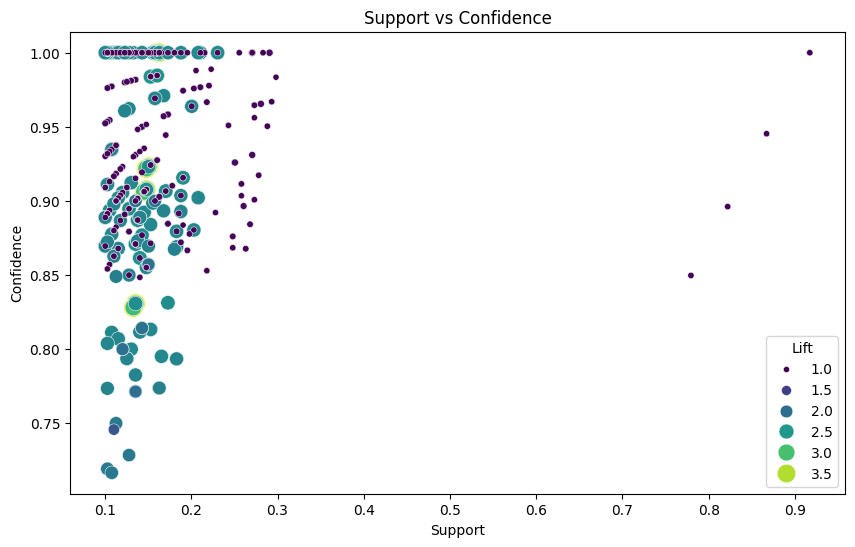

<Figure size 1000x600 with 0 Axes>

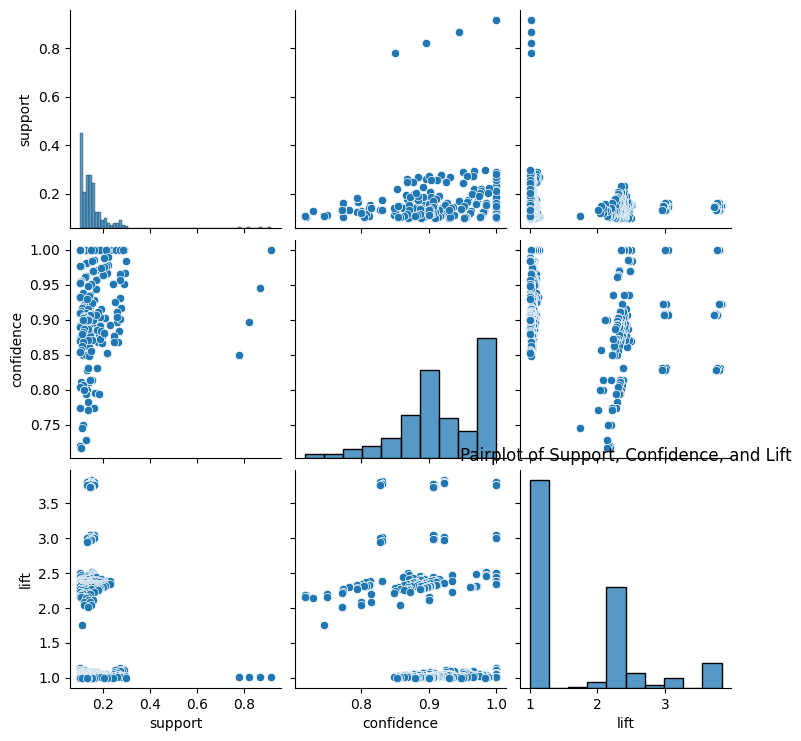

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=sorted_filtered_rules, palette='viridis', sizes=(20, 200))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

# Pairplot for support, confidence, and lift
plt.figure(figsize=(10, 6))
sns.pairplot(sorted_filtered_rules[['support', 'confidence', 'lift']])
plt.title('Pairplot of Support, Confidence, and Lift')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


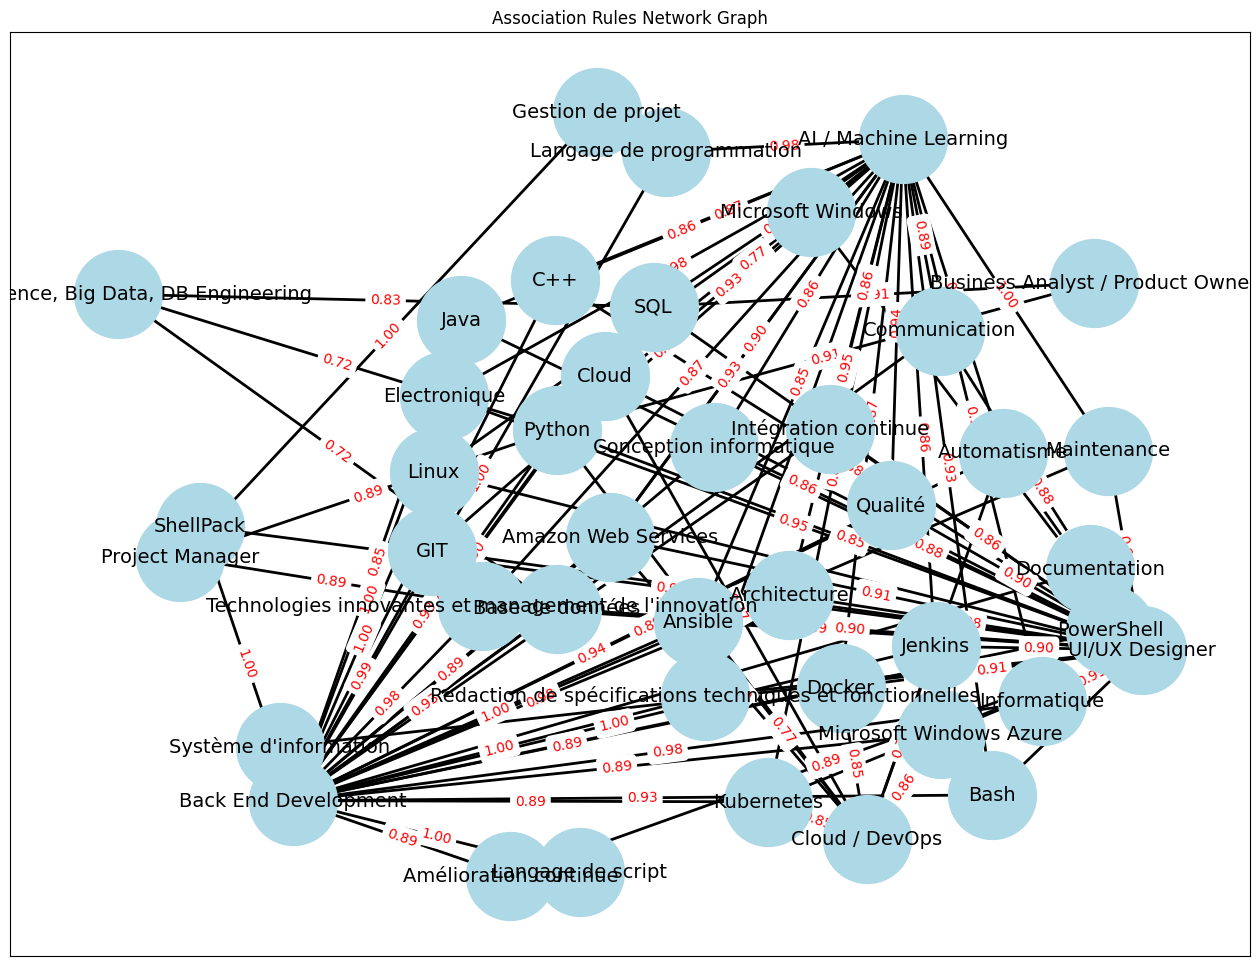

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the association rules
for _, row in sorted_filtered_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Set the layout for the graph
pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42)  # Adjusted the k value and set seed for reproducibility

# Increase figure size
plt.figure(figsize=(16, 12))

# Draw the nodes with larger size
nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='lightblue')

# Draw the edges with weights
edges = nx.draw_networkx_edges(
    G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black', width=2,
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)},
    font_color='red'
)

# Draw the labels with increased font size
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', verticalalignment='center', horizontalalignment='center')

# Set the title
plt.title('Association Rules Network Graph')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


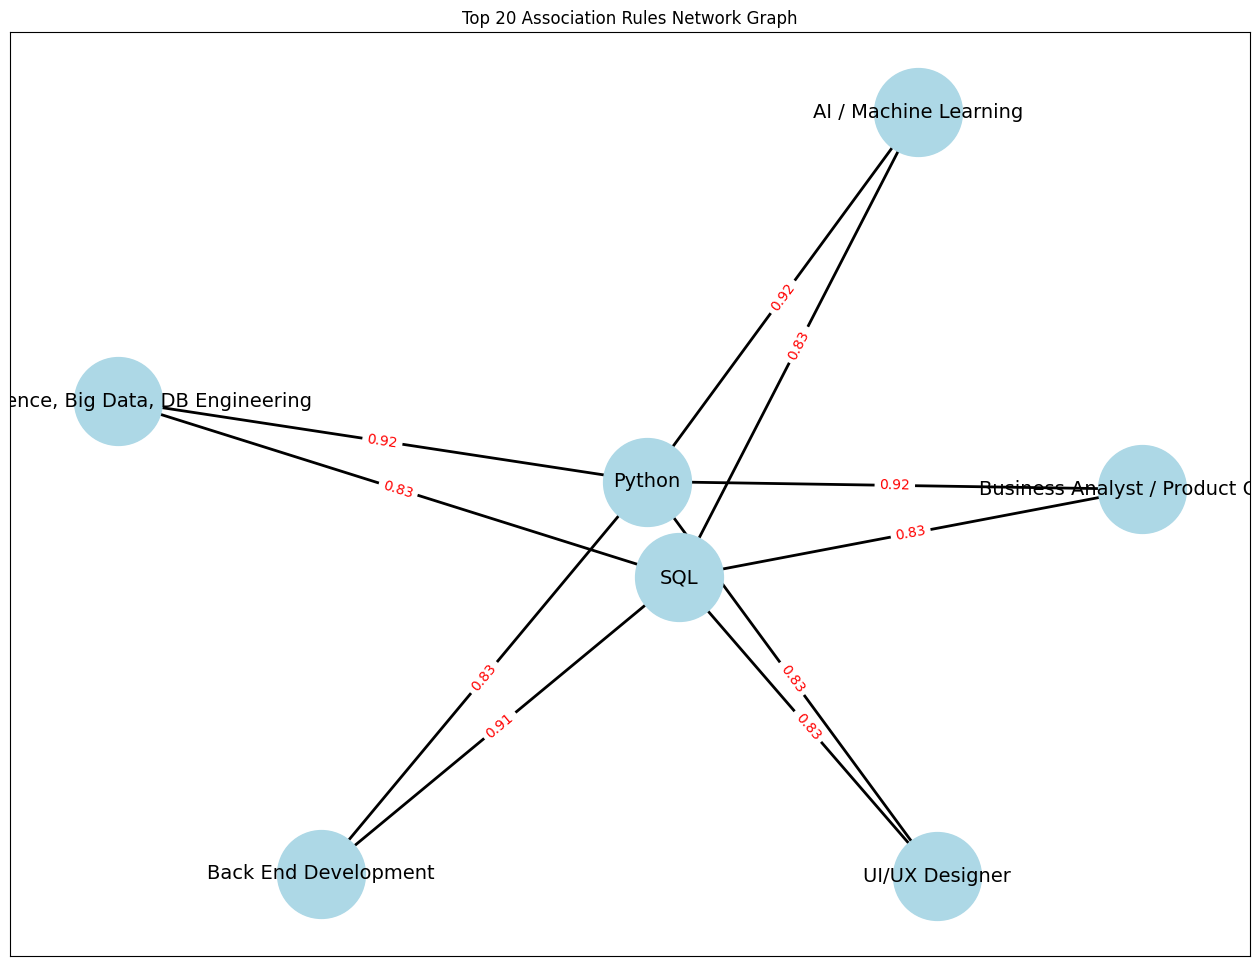

In [ ]:
# Filter top N rules by lift or confidence
top_n = 20
top_rules = sorted_filtered_rules.head(top_n)

# Create a directed graph for top N rules
G_top = nx.DiGraph()

# Add nodes and edges from the top rules
for _, row in top_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            G_top.add_edge(antecedent, consequent, weight=row['confidence'])

# Set the layout for the graph
pos = nx.spring_layout(G_top, k=1.2, iterations=50, seed=42)  # Adjusted the k value and set seed for reproducibility

# Increase figure size
plt.figure(figsize=(16, 12))

# Draw the nodes with larger size
nx.draw_networkx_nodes(G_top, pos, node_size=4000, node_color='lightblue')

# Draw the edges with weights
edges = nx.draw_networkx_edges(
    G_top, pos, arrowstyle='-|>', arrowsize=20, edge_color='black', width=2,
)
nx.draw_networkx_edge_labels(
    G_top, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G_top.edges(data=True)},
    font_color='red'
)

# Draw the labels with increased font size
nx.draw_networkx_labels(G_top, pos, font_size=14, font_family='sans-serif', verticalalignment='center', horizontalalignment='center')

# Set the title
plt.title(f'Top {top_n} Association Rules Network Graph')
plt.show()


In [ ]:
!pip install pyvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
import ast



# Sort rules by lift to see the most interesting ones
sorted_filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Create a pyvis Network
net = Network(notebook=True, height='750px', width='100%', cdn_resources='remote')

# Add nodes and edges from the association rules
for _, row in sorted_filtered_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            net.add_node(antecedent, label=antecedent, color='lightblue')
            net.add_node(consequent, label=consequent, color='lightcoral')
            net.add_edge(antecedent, consequent, title=f"Confidence: {row['confidence']:.2f}")

# Set the physics layout of the network
net.toggle_physics(True)

# Show the network
net.show('association_rules_network.html')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


association_rules_network.html


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
import ast

# Load the original dataset
file_path = '/content/Updated_With_Refined_Educational_Background (1).xlsx'
data = pd.read_excel(file_path)

# Correctly parse the skills and job categories
data['SAVOIR_FAIRE'] = data['SAVOIR_FAIRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
data['Job_Categories'] = data['Job_Categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Binarize the skills and job categories
mlb_skills = MultiLabelBinarizer()
mlb_jobs = MultiLabelBinarizer()

skills_binarized = mlb_skills.fit_transform(data['SAVOIR_FAIRE'])
jobs_binarized = mlb_jobs.fit_transform(data['Job_Categories'])

skills_df = pd.DataFrame(skills_binarized, columns=mlb_skills.classes_)
jobs_df = pd.DataFrame(jobs_binarized, columns=mlb_jobs.classes_)

# Combine the skills and jobs DataFrames for ARM
combined_df = pd.concat([skills_df, jobs_df], axis=1)

# Split into training and test sets
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

# Increase the support threshold to reduce the number of rules
support_threshold = 0.1
confidence_threshold = 0.6

# Generate frequent itemsets with adjusted support threshold
train_frequent_itemsets = apriori(train_df, min_support=support_threshold, use_colnames=True)

# Generate association rules with adjusted confidence threshold
train_rules = association_rules(train_frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Ensure antecedents are only skills and consequents are only job categories
skill_columns = skills_df.columns.tolist()
job_columns = jobs_df.columns.tolist()

train_rules = train_rules[train_rules['antecedents'].apply(lambda x: all(item in skill_columns for item in x))]
train_rules = train_rules[train_rules['consequents'].apply(lambda x: all(item in job_columns for item in x))]

# Filter rules based on confidence and lift
train_filtered_rules = train_rules[(train_rules['confidence'] >= confidence_threshold) &
                                   (train_rules['lift'] >= 1.0)]

# Select the top N rules
top_n = 50
top_rules = train_filtered_rules.head(top_n)

# Function to apply rules to the test set
def apply_rules(test_df, rules):
    correct_predictions = 0
    total_predictions = 0
    coverage_count = 0

    for index, row in test_df.iterrows():
        test_skills = frozenset(row.index[row == 1].tolist())
        matching_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(test_skills))]

        if not matching_rules.empty:
            coverage_count += 1
            for _, rule in matching_rules.iterrows():
                if rule['consequents'].issubset(test_skills):
                    correct_predictions += 1
                total_predictions += 1

    return correct_predictions, total_predictions, coverage_count

# Evaluate coverage and accuracy with the top rules
correct_predictions, total_predictions, coverage_count = apply_rules(test_df, top_rules)

# Calculate and print accuracy and coverage
if total_predictions > 0:
    accuracy = correct_predictions / total_predictions
else:
    accuracy = 0

coverage = coverage_count / len(test_df)

print(f"Top {top_n} Rules ARM Model Accuracy: {accuracy:.2f}")
print(f"Top {top_n} Rules Test Set Coverage: {coverage:.2f}")

# Check the distribution of job categories in the test set to ensure it's representative
print("\nTest set distribution:")
test_distribution = test_df.sum(axis=0)
print(test_distribution.sort_values(ascending=False).head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 50 Rules ARM Model Accuracy: 0.95
Top 50 Rules Test Set Coverage: 0.89

Test set distribution:
Back End Development                      77
AI / Machine Learning                     77
UI/UX Designer                            75
Python                                    70
Linux                                     34
Cloud / DevOps                            34
Data Science, Big Data, DB Engineering    29
Project Manager                           28
Informatique                              26
Automatisme                               25
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


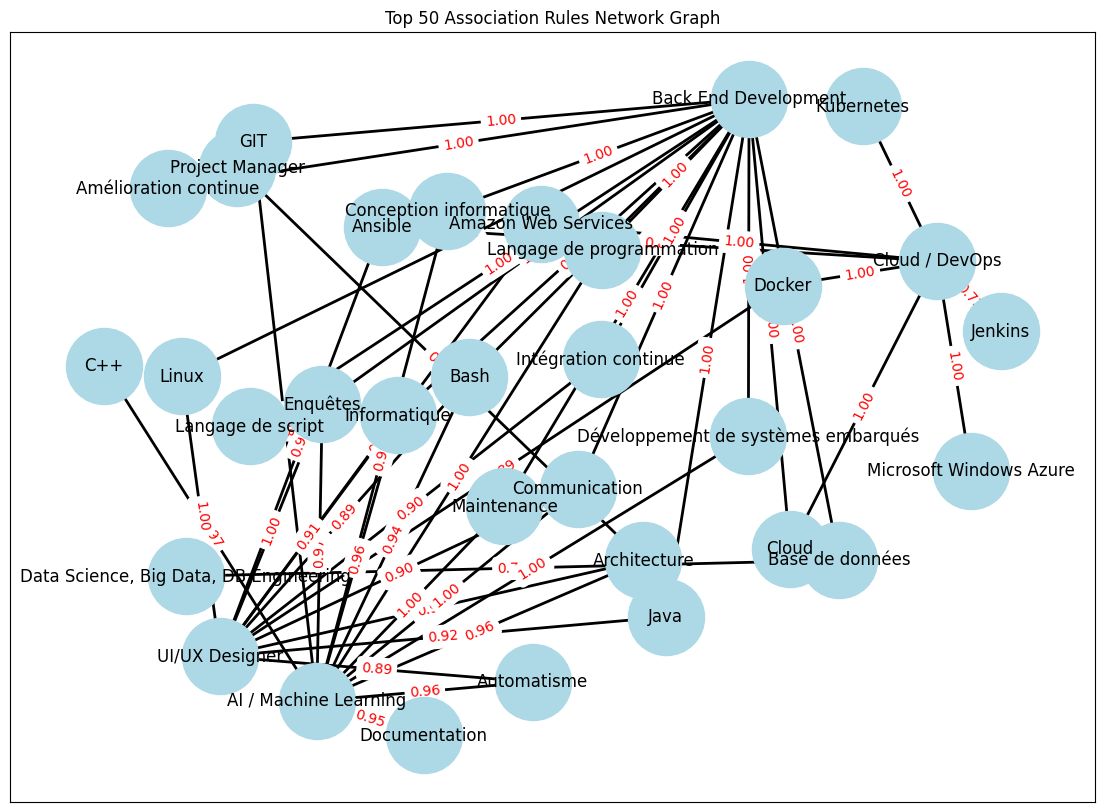

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the top rules
for _, row in top_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Set the layout for the graph
pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42)

# Increase figure size
plt.figure(figsize=(14, 10))

# Draw the nodes with larger size
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')

# Draw the edges with weights
edges = nx.draw_networkx_edges(
    G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black', width=2,
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)},
    font_color='red'
)

# Draw the labels with increased font size
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', verticalalignment='center', horizontalalignment='center')

# Set the title
plt.title('Top 50 Association Rules Network Graph')
plt.show()


In [ ]:
# Review the top rules to ensure they cover common skill combinations
print("Top rules:")
print(top_rules[['antecedents', 'consequents', 'confidence', 'lift']])



Top rules:
                               antecedents  \
6                    (Amazon Web Services)   
7                    (Amazon Web Services)   
9                  (Amélioration continue)   
16                               (Ansible)   
17                               (Ansible)   
19                          (Architecture)   
21                          (Architecture)   
22                          (Architecture)   
24                           (Automatisme)   
26                           (Automatisme)   
29                       (Base de données)   
30                       (Base de données)   
33                                  (Bash)   
34                                  (Bash)   
35                                  (Bash)   
37                                   (C++)   
42                                 (Cloud)   
43                                 (Cloud)   
46                         (Communication)   
47                         (Communication)   
48                     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Expand the set of rules used for recommendations
top_n = 200  # Increase the number of rules considered
expanded_rules = train_filtered_rules.head(top_n)

# Update the recommendation engine with the expanded rules
engine = CareerRecommendationEngine(expanded_rules)

# Example usage with expanded rules
user_skills = ['Python', 'SQL']
recommended_jobs = engine.recommend_job_categories(user_skills)
print("Recommended job categories:", recommended_jobs)


Recommended job categories: set()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class FlexibleCareerRecommendationEngine:
    def __init__(self, rules):
        self.rules = rules

    def recommend_job_categories(self, skills):
        input_skills = frozenset(skills)
        print(f"Input skills: {input_skills}")

        matching_rules = self.rules[self.rules['antecedents'].apply(lambda x: x.issubset(input_skills))]
        print(f"Matching rules:\n{matching_rules}")

        if matching_rules.empty:
            # Try partial matches if no full match is found
            matching_rules = self.rules[self.rules['antecedents'].apply(lambda x: bool(x.intersection(input_skills)))]
            print(f"Partial matching rules:\n{matching_rules}")

        recommended_jobs = set()
        for consequents in matching_rules['consequents']:
            recommended_jobs.update(consequents)

        return recommended_jobs

# Initialize the flexible recommendation engine with the expanded rules
flexible_engine = FlexibleCareerRecommendationEngine(expanded_rules)

# Example usage with flexible matching
user_skills = ['Python', 'SQL']
recommended_jobs = flexible_engine.recommend_job_categories(user_skills)
print("Recommended job categories:", recommended_jobs)


Input skills: frozenset({'Python', 'SQL'})
Matching rules:
    antecedents                               consequents  antecedent support  \
128    (Python)                    (Back End Development)            0.927900   
147       (SQL)                    (Back End Development)            0.172414   
149       (SQL)        (Business Analyst / Product Owner)            0.172414   
150       (SQL)  (Data Science, Big Data, DB Engineering)            0.172414   
151       (SQL)                          (UI/UX Designer)            0.172414   

     consequent support   support  confidence      lift  leverage  conviction  \
128            0.987461  0.927900    1.000000  1.012698  0.011635         inf   
147            0.987461  0.172414    1.000000  1.012698  0.002162         inf   
149            0.269592  0.172414    1.000000  3.709302  0.125932         inf   
150            0.326019  0.172414    1.000000  3.067308  0.116204         inf   
151            0.887147  0.153605    0.890909  1.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Now we wil combine the ARM with the boosting algorithm
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
import ast

# Load the original dataset
file_path = '/content/Updated_With_Refined_Educational_Background (1).xlsx'
data = pd.read_excel(file_path)

# Define a robust parsing function
def robust_parse(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

# Apply the robust parsing function to the relevant columns
data['SAVOIR_FAIRE'] = data['SAVOIR_FAIRE'].apply(robust_parse)
data['Job_Categories'] = data['Job_Categories'].apply(robust_parse)
data['Primary_Intelligence'] = data['Primary_Intelligence'].apply(robust_parse)
data['Secondary_Intelligence'] = data['Secondary_Intelligence'].apply(robust_parse)
data['Bilingual_Enhanced_Skills'] = data['Bilingual_Enhanced_Skills'].apply(robust_parse)

# Binarize the skills and job categories
mlb_skills = MultiLabelBinarizer()
mlb_jobs = MultiLabelBinarizer()
mlb_primary_intelligence = MultiLabelBinarizer()
mlb_secondary_intelligence = MultiLabelBinarizer()
mlb_bilingual_skills = MultiLabelBinarizer()

skills_binarized = mlb_skills.fit_transform(data['SAVOIR_FAIRE'])
jobs_binarized = mlb_jobs.fit_transform(data['Job_Categories'])
primary_intelligence_binarized = mlb_primary_intelligence.fit_transform(data['Primary_Intelligence'])
secondary_intelligence_binarized = mlb_secondary_intelligence.fit_transform(data['Secondary_Intelligence'])
bilingual_skills_binarized = mlb_bilingual_skills.fit_transform(data['Bilingual_Enhanced_Skills'])

skills_df = pd.DataFrame(skills_binarized, columns=mlb_skills.classes_)
jobs_df = pd.DataFrame(jobs_binarized, columns=mlb_jobs.classes_)
primary_intelligence_df = pd.DataFrame(primary_intelligence_binarized, columns=mlb_primary_intelligence.classes_)
secondary_intelligence_df = pd.DataFrame(secondary_intelligence_binarized, columns=mlb_secondary_intelligence.classes_)
bilingual_skills_df = pd.DataFrame(bilingual_skills_binarized, columns=mlb_bilingual_skills.classes_)

# Combine all features into one DataFrame
combined_df = pd.concat([skills_df, primary_intelligence_df, secondary_intelligence_df, bilingual_skills_df, jobs_df], axis=1)

# Split into training and test sets
X = combined_df.drop(columns=jobs_df.columns)
y = jobs_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MultiOutputClassifier with XGBClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

xgb = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=jobs_df.columns))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                        precision    recall  f1-score   support

                 AI / Machine Learning       0.99      0.97      0.98        77
                  Back End Development       0.97      0.99      0.98        77
      Business Analyst / Product Owner       1.00      0.95      0.97        20
                        Cloud / DevOps       0.97      0.97      0.97        34
Content Creator / Community Management       0.00      0.00      0.00         1
                         Cybersecurity       0.00      0.00      0.00         0
Data Science, Big Data, DB Engineering       1.00      0.79      0.88        29
                 Front End Development       1.00      0.71      0.83        14
                Full Stack Development       0.92      0.92      0.92        12
        Network and System Engineering       1.00      0.83      0.91         6
                       Project Manager       0.92      0.86      0.89        28
      Support, ITSM, Customer Services 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class CombinedRecommendationEngine:
    def __init__(self, arm_rules, xgb_model):
        self.arm_engine = FlexibleCareerRecommendationEngine(arm_rules)
        self.xgb_model = xgb_model

    def recommend_job_categories(self, skills, primary_intelligence, secondary_intelligence, bilingual_skills):
        # Get ARM recommendations
        arm_recommendations = self.arm_engine.recommend_job_categories(skills)

        # Prepare the input for the boosting algorithm
        input_skills = pd.DataFrame([mlb_skills.transform([skills])[0]], columns=mlb_skills.classes_)
        input_primary_intelligence = pd.DataFrame([mlb_primary_intelligence.transform([primary_intelligence])[0]], columns=mlb_primary_intelligence.classes_)
        input_secondary_intelligence = pd.DataFrame([mlb_secondary_intelligence.transform([secondary_intelligence])[0]], columns=mlb_secondary_intelligence.classes_)
        input_bilingual_skills = pd.DataFrame([mlb_bilingual_skills.transform([bilingual_skills])[0]], columns=mlb_bilingual_skills.classes_)

        input_features = pd.concat([input_skills, input_primary_intelligence, input_secondary_intelligence, input_bilingual_skills], axis=1)

        # Get boosting algorithm predictions
        boosting_predictions = self.xgb_model.predict(input_features)

        # Combine ARM and boosting predictions
        recommended_jobs = set(arm_recommendations)
        for idx, job in enumerate(jobs_df.columns):
            if boosting_predictions[0, idx] == 1:
                recommended_jobs.add(job)

        return recommended_jobs

# Initialize the combined recommendation engine with the expanded rules
combined_engine = CombinedRecommendationEngine(expanded_rules, xgb)

# Example usage
user_skills = ['Python', 'SQL']
primary_intelligence = ['Logical-Mathematical']
secondary_intelligence = ['Linguistic']
bilingual_skills = ['Multilingual']
recommended_jobs = combined_engine.recommend_job_categories(user_skills, primary_intelligence, secondary_intelligence, bilingual_skills)
print("Recommended job categories:", recommended_jobs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Logical-Mathematical'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Linguistic'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Multilingual'] will be ignored
  warnings.warn(


Input skills: frozenset({'Python', 'SQL'})
Matching rules:
    antecedents                               consequents  antecedent support  \
128    (Python)                    (Back End Development)            0.927900   
147       (SQL)                    (Back End Development)            0.172414   
149       (SQL)        (Business Analyst / Product Owner)            0.172414   
150       (SQL)  (Data Science, Big Data, DB Engineering)            0.172414   
151       (SQL)                          (UI/UX Designer)            0.172414   

     consequent support   support  confidence      lift  leverage  conviction  \
128            0.987461  0.927900    1.000000  1.012698  0.011635         inf   
147            0.987461  0.172414    1.000000  1.012698  0.002162         inf   
149            0.269592  0.172414    1.000000  3.709302  0.125932         inf   
150            0.326019  0.172414    1.000000  3.067308  0.116204         inf   
151            0.887147  0.153605    0.890909  1.

In [ ]:
# Example usage
user_skills = ['Linux', 'Python', 'Automatisme', 'SQL']
primary_intelligence = ['creative']
secondary_intelligence = ['spatial']
bilingual_skills = ['Multilingual']
recommended_jobs = combined_engine.recommend_job_categories(user_skills, primary_intelligence, secondary_intelligence, bilingual_skills)
print("Recommended job categories:", recommended_jobs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['creative'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['spatial'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Multilingual'] will be ignored
  warnings.warn(


Input skills: frozenset({'Linux', 'Python', 'SQL', 'Automatisme'})
Matching rules:
               antecedents                                    consequents  \
24           (Automatisme)                        (AI / Machine Learning)   
26           (Automatisme)                               (UI/UX Designer)   
106                (Linux)                         (Back End Development)   
107                (Linux)                               (UI/UX Designer)   
128               (Python)                         (Back End Development)   
147                  (SQL)                         (Back End Development)   
149                  (SQL)             (Business Analyst / Product Owner)   
150                  (SQL)       (Data Science, Big Data, DB Engineering)   
151                  (SQL)                               (UI/UX Designer)   
338   (Linux, Automatisme)                               (UI/UX Designer)   
340  (Python, Automatisme)                        (AI / Machine Learni

In [ ]:
#cross validation test for the boosting algorithm

# Verify the target labels
print("Unique values in the target labels:")
for column in y.columns:
    print(f"{column}: {y[column].unique()}")


Unique values in the target labels:
AI / Machine Learning: [1 0]
Back End Development: [1 0]
Business Analyst / Product Owner: [0 1]
Cloud / DevOps: [0 1]
Content Creator / Community Management: [0 1]
Cybersecurity: [0 1]
Data Science, Big Data, DB Engineering: [0 1]
Front End Development: [1 0]
Full Stack Development: [1 0]
Network and System Engineering: [0 1]
Project Manager: [0 1]
Support, ITSM, Customer Services: [0 1]
UI/UX Designer: [1 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define a custom cross-validation function
def custom_cross_val_score(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Handle potential issues with missing classes in y_train
        for column in y_train.columns:
            if len(y_train[column].unique()) == 1:
                # All values are the same, skip this column for training
                y_train = y_train.drop(columns=[column])
                y_test = y_test.drop(columns=[column])

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        # Calculate the accuracy for each output separately and average them
        individual_accuracies = []
        for i, col in enumerate(y_test.columns):
            individual_accuracies.append(accuracy_score(y_test[col], y_pred[:, i]))

        scores.append(np.mean(individual_accuracies))

    return np.array(scores)

# Create the MultiOutputClassifier with XGBClassifier
xgb = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# Perform custom cross-validation
scores = custom_cross_val_score(xgb, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validation scores: [0.95673077 0.95384615 0.94807692 0.96153846 0.96624473]
Mean cross-validation score: 0.957287406686141


In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Use the default parameters for XGBClassifier
xgb = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# Train the model on the training data
xgb.fit(X_train, y_train)

# Initialize the combined recommendation engine with the default model
combined_engine = CombinedRecommendationEngine(expanded_rules, xgb)

# Example usage
user_skills = ['Python', 'SQL']
primary_intelligence = ['Logical-Mathematical']
secondary_intelligence = ['Linguistic']
bilingual_skills = ['Multilingual']

recommended_jobs = combined_engine.recommend_job_categories(user_skills, primary_intelligence, secondary_intelligence, bilingual_skills)
print("Recommended job categories:", recommended_jobs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input skills: frozenset({'Python', 'SQL'})
Matching rules:
    antecedents                               consequents  antecedent support  \
128    (Python)                    (Back End Development)            0.927900   
147       (SQL)                    (Back End Development)            0.172414   
149       (SQL)        (Business Analyst / Product Owner)            0.172414   
150       (SQL)  (Data Science, Big Data, DB Engineering)            0.172414   
151       (SQL)                          (UI/UX Designer)            0.172414   

     consequent support   support  confidence      lift  leverage  conviction  \
128            0.987461  0.927900    1.000000  1.012698  0.011635         inf   
147            0.987461  0.172414    1.000000  1.012698  0.002162         inf   
149            0.269592  0.172414    1.000000  3.709302  0.125932         inf   
150            0.326019  0.172414    1.000000  3.067308  0.116204         inf   
151            0.887147  0.153605    0.890909  1.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Logical-Mathematical'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Linguistic'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Multilingual'] will be ignored
  warnings.warn(


Recommended job categories: {'AI / Machine Learning', 'Back End Development', 'Data Science, Big Data, DB Engineering', 'UI/UX Designer', 'Business Analyst / Product Owner'}


In [ ]:
# Example usage
user_skills = ['UX-UI design','Graphic Design','marketing']
primary_intelligence = ['creative']
secondary_intelligence = ['spatiale']
bilingual_skills = ['Multilingual']

recommended_jobs = combined_engine.recommend_job_categories(user_skills, primary_intelligence, secondary_intelligence, bilingual_skills)
print("Recommended job categories:", recommended_jobs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Graphic Design', 'UX-UI design', 'marketing'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['creative'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['spatiale'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Multilingual'] will be ignored
  warni

Input skills: frozenset({'UX-UI design', 'marketing', 'Graphic Design'})
Matching rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Partial matching rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Recommended job categories: {'AI / Machine Learning', 'UI/UX Designer', 'Back End Development'}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

class CombinedRecommendationEngine:
    def __init__(self, arm_rules, xgb_model):
        self.arm_engine = FlexibleCareerRecommendationEngine(arm_rules)
        self.xgb_model = xgb_model

    def recommend_job_categories(self, skills, primary_intelligence, secondary_intelligence, bilingual_skills):
        # Get ARM recommendations
        arm_recommendations = self.arm_engine.recommend_job_categories(skills)

        # Prepare the input for the boosting algorithm
        input_skills = pd.DataFrame([mlb_skills.transform([skills])[0]], columns=mlb_skills.classes_)
        input_primary_intelligence = pd.DataFrame([mlb_primary_intelligence.transform([primary_intelligence])[0]], columns=mlb_primary_intelligence.classes_)
        input_secondary_intelligence = pd.DataFrame([mlb_secondary_intelligence.transform([secondary_intelligence])[0]], columns=mlb_secondary_intelligence.classes_)
        input_bilingual_skills = pd.DataFrame([mlb_bilingual_skills.transform([bilingual_skills])[0]], columns=mlb_bilingual_skills.classes_)

        input_features = pd.concat([input_skills, input_primary_intelligence, input_secondary_intelligence, input_bilingual_skills], axis=1)

        # Get boosting algorithm predictions
        boosting_predictions = self.xgb_model.predict(input_features)

        # Combine ARM and boosting predictions
        recommended_jobs = set(arm_recommendations)
        for idx, job in enumerate(jobs_df.columns):
            if boosting_predictions[0, idx] == 1:
                recommended_jobs.add(job)

        return recommended_jobs

def combined_cross_val_score(arm_rules, xgb_model, X, y, cv=5):
    kf = KFold(n_splits=cv)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ensure class presence
        unique_classes_train = [y_train[col].unique() for col in y_train.columns]
        missing_classes = any(len(unique) < 2 for unique in unique_classes_train)

        if missing_classes:
            print(f"Skipping fold due to missing classes in training set.")
            continue

        # Train the boosting algorithm
        xgb_model.fit(X_train, y_train)

        # Initialize the combined recommendation engine
        combined_engine = CombinedRecommendationEngine(arm_rules, xgb_model)

        # Generate predictions for the test set
        predictions = []
        for i in range(len(X_test)):
            skills = X_test.iloc[i][mlb_skills.classes_].index[X_test.iloc[i][mlb_skills.classes_] == 1].tolist()
            primary_intelligence = X_test.iloc[i][mlb_primary_intelligence.classes_].index[X_test.iloc[i][mlb_primary_intelligence.classes_] == 1].tolist()
            secondary_intelligence = X_test.iloc[i][mlb_secondary_intelligence.classes_].index[X_test.iloc[i][mlb_secondary_intelligence.classes_] == 1].tolist()
            bilingual_skills = X_test.iloc[i][mlb_bilingual_skills.classes_].index[X_test.iloc[i][mlb_bilingual_skills.classes_] == 1].tolist()

            recommended_jobs = combined_engine.recommend_job_categories(skills, primary_intelligence, secondary_intelligence, bilingual_skills)
            prediction = [1 if job in recommended_jobs else 0 for job in jobs_df.columns]
            predictions.append(prediction)

        predictions = np.array(predictions)

        # Calculate evaluation metrics for each output separately and average them
        individual_accuracies = []
        individual_precisions = []
        individual_recalls = []
        individual_f1s = []
        for i, col in enumerate(y_test.columns):
            individual_accuracies.append(accuracy_score(y_test[col], predictions[:, i]))
            individual_precisions.append(precision_score(y_test[col], predictions[:, i]))
            individual_recalls.append(recall_score(y_test[col], predictions[:, i]))
            individual_f1s.append(f1_score(y_test[col], predictions[:, i]))

        accuracy_scores.append(np.mean(individual_accuracies))
        precision_scores.append(np.mean(individual_precisions))
        recall_scores.append(np.mean(individual_recalls))
        f1_scores.append(np.mean(individual_f1s))

    return {
        "accuracy": np.array(accuracy_scores),
        "precision": np.array(precision_scores),
        "recall": np.array(recall_scores),
        "f1": np.array(f1_scores)
    }

# Perform custom cross-validation for the combined model with default parameters
metrics = combined_cross_val_score(expanded_rules, xgb, X, y, cv=5)

print(f"Cross-validation accuracy scores: {metrics['accuracy']}")
print(f"Mean cross-validation accuracy score: {metrics['accuracy'].mean()}")
print(f"Cross-validation precision scores: {metrics['precision']}")
print(f"Mean cross-validation precision score: {metrics['precision'].mean()}")
print(f"Cross-validation recall scores: {metrics['recall']}")
print(f"Mean cross-validation recall score: {metrics['recall'].mean()}")
print(f"Cross-validation F1 scores: {metrics['f1']}")
print(f"Mean cross-validation F1 score: {metrics['f1'].mean()}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
638  (Intégration continue, Python)   
641  (Intégration continue, Python)   
649          (Intégration continue)   
652          (Intégration continue)   
768           (Maintenance, Python)   
771           (Maintenance, Python)   
779                   (Maintenance)   
782                   (Maintenance)   
785                   (Maintenance)   

                                       consequents  antecedent support  \
37                         (AI / Machine Learning)            0.219436   
81                          (Back End Development)            0.128527   
82                                (UI/UX Designer)            0.128527   
109                        (AI / Machine Learning)            0.131661   
110                         (Back End Development)            0.131661   
128                         (Back End Development)            0.927900   
404                        (AI / Machine Learning)            0.210031   
407  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Streaming output truncated to the last 5000 lines.
9                           (Back End Development)            0.109718   
24                         (AI / Machine Learning)            0.278997   
26                                (UI/UX Designer)            0.278997   
42                          (Back End Development)            0.228840   
43                                (Cloud / DevOps)            0.228840   
61                         (AI / Machine Learning)            0.172414   
72                         (AI / Machine Learning)            0.191223   
73                          (Back End Development)            0.191223   
76                         (AI / Machine Learning)            0.297806   
77                          (Back End Development)            0.297806   
78                                (UI/UX Designer)            0.297806   
90                                (Cloud / DevOps)            0.137931   
128                         (Back End Development)           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and bei

Streaming output truncated to the last 5000 lines.
749            0.987461  0.244514    1.000000  1.012698  0.003066         inf   
753            0.887147  0.244514    1.000000  1.127208  0.027594         inf   
762            0.840125  0.238245    0.926829  1.103203  0.022288    2.184953   
766            0.874608  0.253918    0.987805  1.129426  0.029098   10.282132   
789            0.987461  0.119122    1.000000  1.012698  0.001494         inf   
793            0.426332  0.119122    1.000000  2.345588  0.068337         inf   
803            0.385580  0.119122    0.904762  2.346496  0.068356    6.451411   
809            0.423197  0.128527    0.976190  2.306702  0.072808   24.225705   
815            0.369906  0.115987    0.880952  2.381558  0.067285    5.292790   

     zhangs_metric  
37        0.036735  
50        0.039251  
51        0.014493  
61        0.002404  
65        0.062937  
66        0.013986  
72        0.050323  
73        0.015504  
76        0.021291  
77       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
371            0.326019  0.106583    0.772727  2.370192  0.061615    2.965517   
382            0.297806  0.103448    0.702128  2.357671  0.059571    2.357367   
388            0.326019  0.112853    0.765957  2.349427  0.064819    2.879738   
394            0.288401  0.100313    0.680851  2.360777  0.057822    2.229676   
395            0.987461  0.100313    1.000000  1.012698  0.001258         inf   
400            0.931034  0.106583    0.944444  1.014403  0.001513    1.241379   
403            0.874608  0.100313    0.888889  1.016328  0.001612    1.128527   
731            0.987461  0.134796    1.000000  1.012698  0.001690         inf   
749            0.987461  0.244514    1.000000  1.012698  0.003066         inf   
753            0.887147  0.244514    1.000000  1.127208  0.027594         inf   
762            0.840125  0.238245    0.926829  1.103203  0.022288    2.184953   
766            0.874608  0.253918    0.987805  1.129426  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

In [ ]:
!pip install streamlit localtunnel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [ ]:
#Deployment

import joblib

# Save the models and encoders
joblib.dump(expanded_rules, 'expanded_rules.pkl')
joblib.dump(xgb, 'xgb_model_default.pkl')
joblib.dump(mlb_skills, 'mlb_skills.pkl')
joblib.dump(mlb_primary_intelligence, 'mlb_primary_intelligence.pkl')
joblib.dump(mlb_secondary_intelligence, 'mlb_secondary_intelligence.pkl')
joblib.dump(mlb_bilingual_skills, 'mlb_bilingual_skills.pkl')
joblib.dump(jobs_df, 'jobs_df.pkl')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['jobs_df.pkl']

In [ ]:
!npm install -g localtunnel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 2.863s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.8.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.8.0   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯



In [ ]:
# Load the saved model to verify
loaded_model = joblib.load('xgb_model_default.pkl')

# Check if the model has been fitted
if hasattr(loaded_model, 'estimators_'):
    print("Model loaded and fitted successfully.")
else:
    print("Model is not fitted.")


Model loaded and fitted successfully.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import joblib

# After training your model
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['feature_names.pkl']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
from sklearn.exceptions import NotFittedError

# Load the saved models and encoders with correct paths
expanded_rules = joblib.load('/content/expanded_rules.pkl')
xgb_model = joblib.load('/content/xgb_model_default.pkl')
mlb_skills = joblib.load('/content/mlb_skills.pkl')
mlb_primary_intelligence = joblib.load('/content/mlb_primary_intelligence.pkl')
mlb_secondary_intelligence = joblib.load('/content/mlb_secondary_intelligence.pkl')
mlb_bilingual_skills = joblib.load('/content/mlb_bilingual_skills.pkl')
jobs_df = joblib.load('/content/jobs_df.pkl')
feature_names = joblib.load('feature_names.pkl')


# List of available options
skill_options = mlb_skills.classes_
primary_intelligence_options = [
    'social', 'creative', 'linguistic', 'analytical',
    'logical-mathematical', 'practical', 'emotional', 'spatial'
]
secondary_intelligence_options = primary_intelligence_options

# Define the FlexibleCareerRecommendationEngine class
class FlexibleCareerRecommendationEngine:
    def __init__(self, rules):
        self.rules = rules

    def recommend_job_categories(self, skills):
        input_skills = frozenset(skills)
        matching_rules = self.rules[self.rules['antecedents'].apply(lambda x: x.issubset(input_skills))]
        recommended_jobs = set()
        for consequents in matching_rules['consequents']:
            recommended_jobs.update(consequents)
        return recommended_jobs

# Define the CombinedRecommendationEngine class
class CombinedRecommendationEngine:
    def __init__(self, arm_rules, xgb_model):
        self.arm_engine = FlexibleCareerRecommendationEngine(arm_rules)
        self.xgb_model = xgb_model

    def recommend_job_categories(self, skills, primary_intelligence, secondary_intelligence):
        # Get ARM recommendations
        arm_recommendations = self.arm_engine.recommend_job_categories(skills)

        # Prepare the input for the boosting algorithm
        try:
            input_skills = pd.DataFrame([mlb_skills.transform([skills])[0]], columns=mlb_skills.classes_)
            input_primary_intelligence = pd.DataFrame([mlb_primary_intelligence.transform([primary_intelligence])[0]], columns=mlb_primary_intelligence.classes_)
            input_secondary_intelligence = pd.DataFrame([mlb_secondary_intelligence.transform([secondary_intelligence])[0]], columns=mlb_secondary_intelligence.classes_)

            # Combine the input features
            input_features = pd.concat([input_skills, input_primary_intelligence, input_secondary_intelligence], axis=1)
            input_features = input_features.loc[:, ~input_features.columns.duplicated()]  # Remove duplicate columns

            # Ensure the input_features has all the columns expected by the model
            input_features = input_features.reindex(columns=feature_names, fill_value=0)
        except Exception as e:
            st.write(f"Error in preparing input features: {e}")
            return None

        # Get boosting algorithm predictions
        try:
            if not hasattr(self.xgb_model, 'estimators_'):
                raise NotFittedError("The boosting model is not fitted.")
            boosting_predictions = self.xgb_model.predict(input_features)
        except NotFittedError as e:
            st.write(f"Error in boosting model predictions: {e}")
            boosting_predictions = None
        except Exception as e:
            st.write(f"Unexpected error in boosting model predictions: {e}")
            boosting_predictions = None

        # Combine ARM and boosting predictions
        recommended_jobs = set(arm_recommendations)
        if boosting_predictions is not None:
            try:
                for idx, job in enumerate(jobs_df.columns):
                    if boosting_predictions[0, idx] == 1:
                        recommended_jobs.add(job)
            except Exception as e:
                st.write(f"Error in combining recommendations: {e}")

        return recommended_jobs

        # Job categories descriptions
job_descriptions = {
    'UI/UX Designer': 'UI/UX Designers are responsible for creating the visual and interactive aspects of a product. They ensure that the product is user-friendly and engaging.',
    'AI / Machine Learning': 'AI and Machine Learning professionals develop algorithms and models that enable computers to learn and make decisions. This field involves working with large datasets and requires strong programming skills.',
    'Back End Development': 'Back End Developers focus on server-side logic, databases, and application integration. They ensure that the front end of a website or application functions seamlessly.',
    'Data Scientist': 'Data Scientists analyze and interpret complex data to help organizations make informed decisions. They use statistical methods, machine learning, and data visualization techniques.',
    'Project Manager': 'Project Managers plan, execute, and oversee projects to ensure they are completed on time, within scope, and within budget. They coordinate between teams and stakeholders.'
}

# Initialize the combined recommendation engine
combined_engine = CombinedRecommendationEngine(expanded_rules, xgb_model)

# Streamlit app
st.title('Career Recommendation System')

# Display an image at the beginning of the form
st.image("https://images.unsplash.com/photo-1522071820081-009f0129c71c", use_column_width=True)

# Input fields
name = st.text_input('Enter your name:')
skills = st.multiselect('Select your skills:', options=skill_options)

# Option for users to choose if they know their types of intelligence
know_intelligence = st.radio('Do you know your types of intelligence?', ('Yes', 'No'))

if know_intelligence == 'Yes':
    primary_intelligence = st.selectbox('Select your primary intelligence:', options=primary_intelligence_options)
    secondary_intelligence = st.selectbox('Select your secondary intelligence:', options=secondary_intelligence_options)
else:
    st.write("If you don't know your types of intelligence, please follow this link to take a test and find out: [Multiple Intelligences Test](https://www.literacynet.org/mi/assessment/findyourstrengths.html)")
    primary_intelligence = st.selectbox('Select your primary intelligence after taking the test:', options=primary_intelligence_options)
    secondary_intelligence = st.selectbox('Select your secondary intelligence after taking the test:', options=secondary_intelligence_options)

if st.button('Recommend Jobs'):
    recommended_jobs = combined_engine.recommend_job_categories(skills, [primary_intelligence], [secondary_intelligence])

    if recommended_jobs:
        st.success(f'Hi {name}! Your recommended job categories suitable for your profile are:')
        for idx, job in enumerate(recommended_jobs, start=1):
            description = job_descriptions.get(job, 'No description available.')
            st.write(f'{idx}: {job}\n{description}')

        # Add a motivational quote and a message in a box
        st.markdown(
            """
            <div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 5px;">
                <p>"The future belongs to those who believe in the beauty of their dreams." - Eleanor Roosevelt</p>
                <p>Remember, finding the right career is a journey. Keep exploring and follow your passion!</p>
            </div>
            """,
            unsafe_allow_html=True
        )
    else:
        st.warning(f'Hi {name}, we could not find any job recommendations for your profile.')

Overwriting app.py


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Run the Streamlit app in the background
import os
os.system('streamlit run app.py &')

!curl ifconfig.me

# Expose the Streamlit app using localtunnel
!npx localtunnel --port 8501



35.239.165.144

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


npx: installed 22 in 3.161s
your url is: https://many-areas-obey.loca.lt
^C


In [ ]:
from google.colab import files

# Download the app script
files.download('app.py')

# Download the model files
files.download('expanded_rules.pkl')
files.download('xgb_model_default.pkl')
files.download('mlb_skills.pkl')
files.download('mlb_primary_intelligence.pkl')
files.download('mlb_secondary_intelligence.pkl')
files.download('mlb_bilingual_skills.pkl')
files.download('jobs_df.pkl')
files.download('feature_names.pkl')

# If you don't have a requirements.txt yet, create one with the following:
!pip freeze > requirements.txt
files.download('requirements.txt')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>